Diabetes Presdiction Using ML**

Importing Libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import metrics 
from sklearn.metrics import roc_curve, accuracy_score, confusion_matrix
from sklearn import datasets 
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from itertools import cycle

In [2]:
df = pd.read_csv('/kaggle/input/diabetesdataanslysis/diabetes.csv')
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
101,1,151,60,0,0,26.1,0.179,22,0
614,11,138,74,26,144,36.1,0.557,50,1
285,7,136,74,26,135,26.0,0.647,51,0
269,2,146,0,0,0,27.5,0.240,28,1
406,4,115,72,0,0,28.9,0.376,46,1
735,4,95,60,32,0,35.4,0.284,28,0
343,5,122,86,0,0,34.7,0.290,33,0
426,0,94,0,0,0,0.0,0.256,25,0
435,0,141,0,0,0,42.4,0.205,29,1
212,7,179,95,31,0,34.2,0.164,60,0


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail

<bound method NDFrame.tail of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50 

In [5]:
 df.rename(columns={"Outcome":"Diabetes"}, inplace= True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.shape

(768, 9)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Diabetes,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64


checking for null values

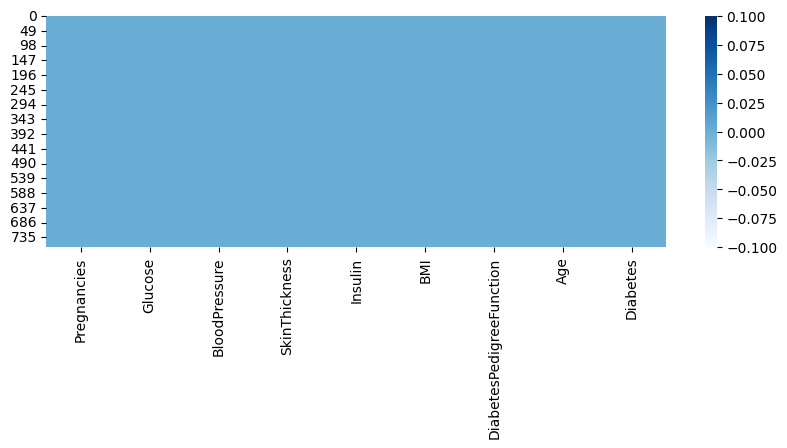

In [10]:
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues')
plt.show()

checking for duplicated values 

In [11]:
df.duplicated().sum()

0

EDA****

Univariate Analysis
Histogram

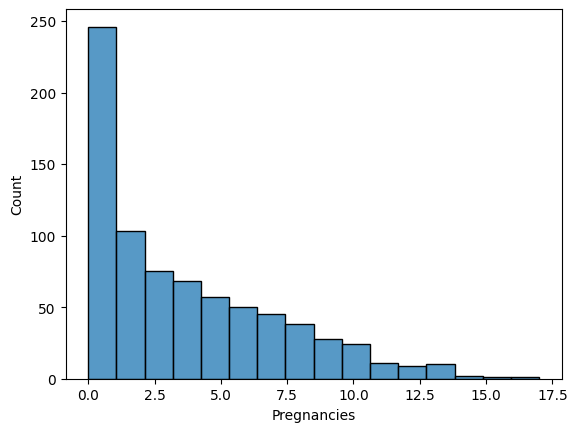

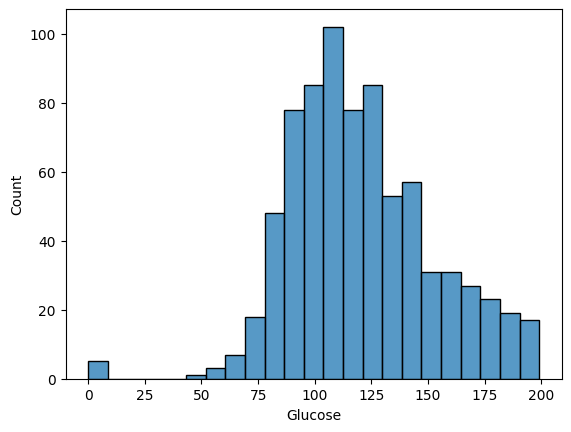

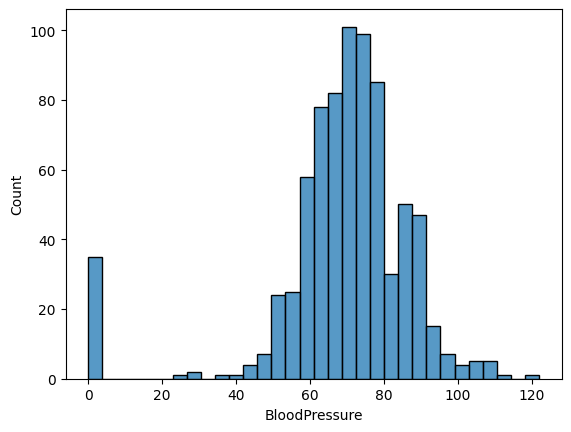

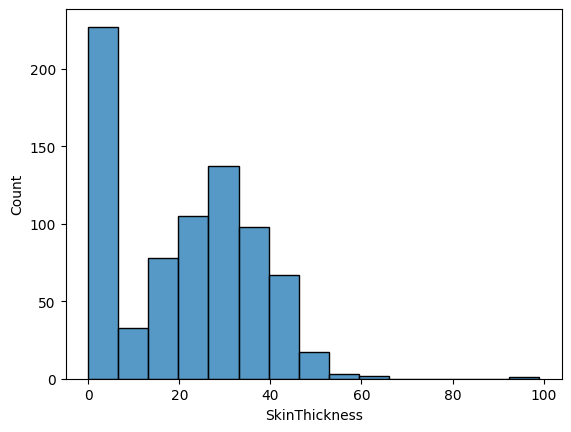

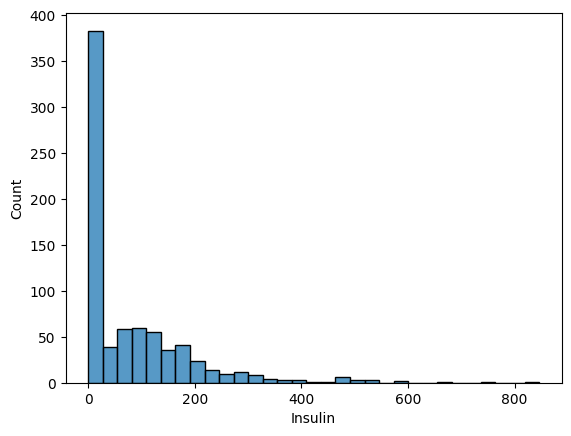

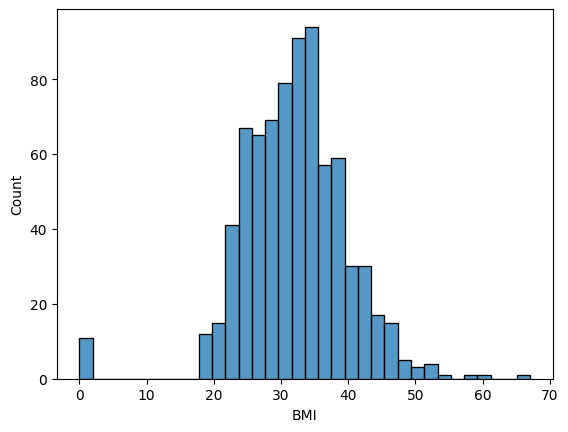

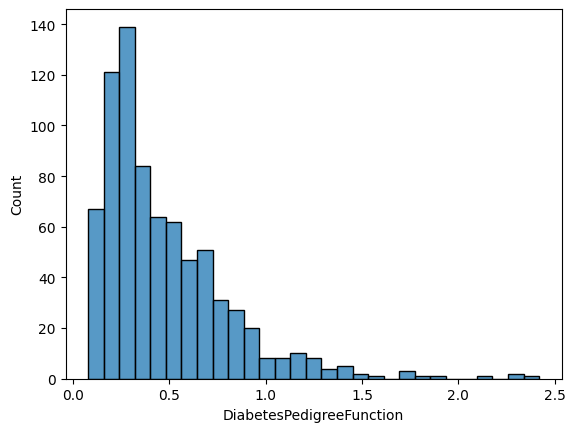

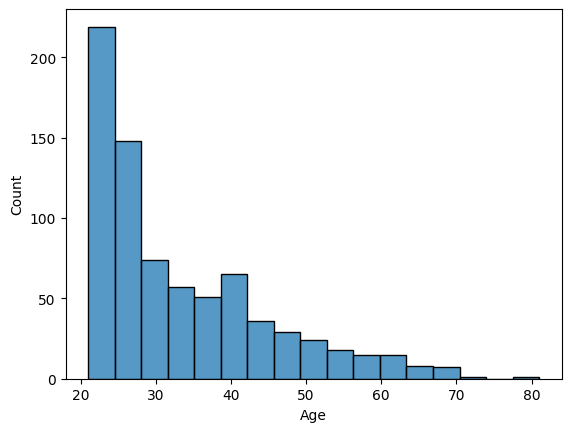

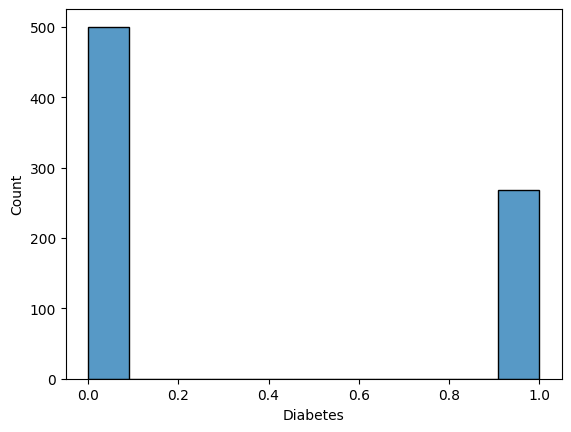

In [12]:
for i in df.columns :
    if df[i].dtype != "object":
       sns.histplot(x=df[i])
    plt.show();

Kde

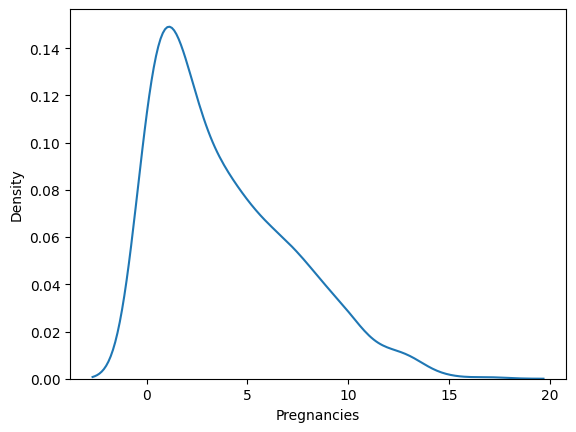

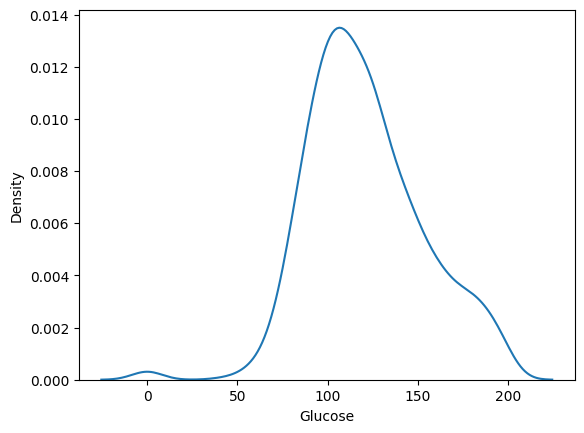

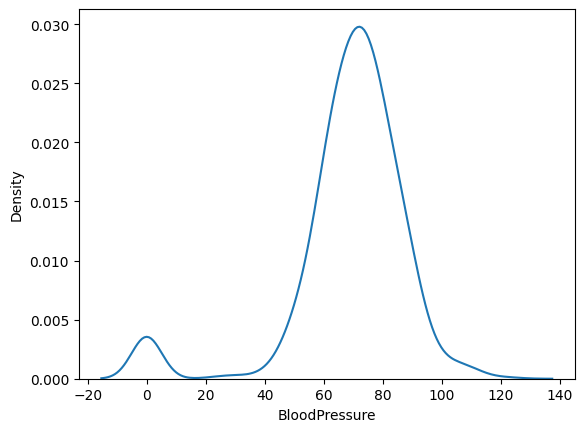

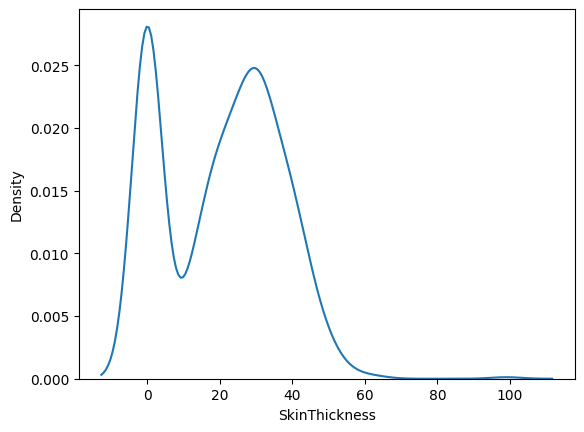

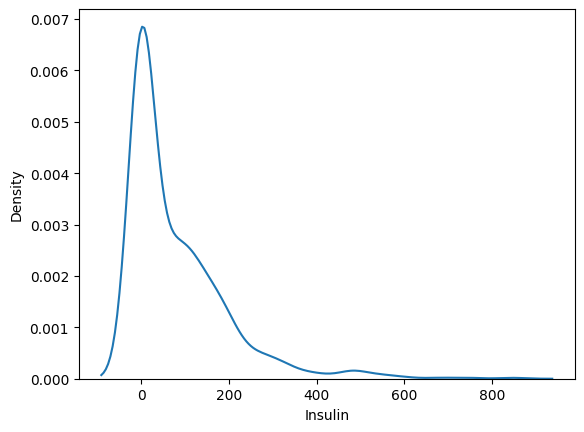

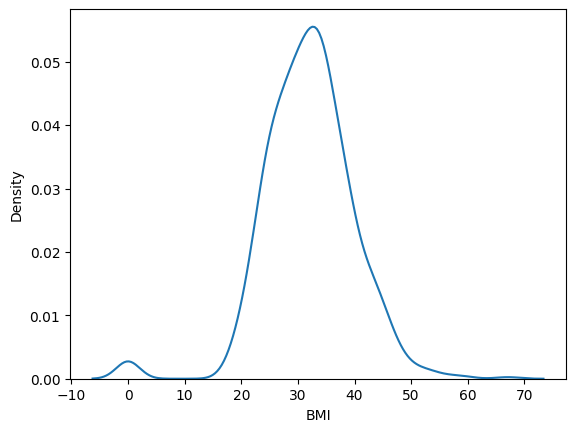

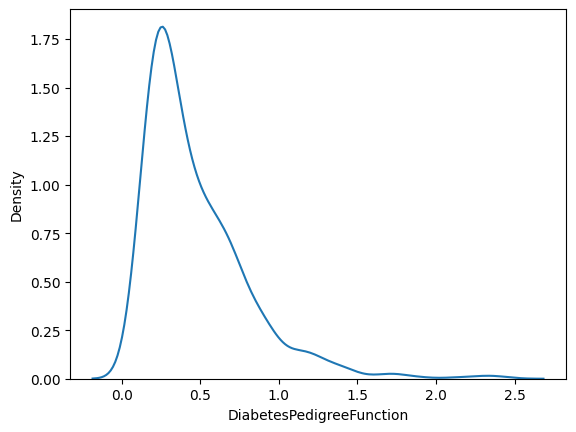

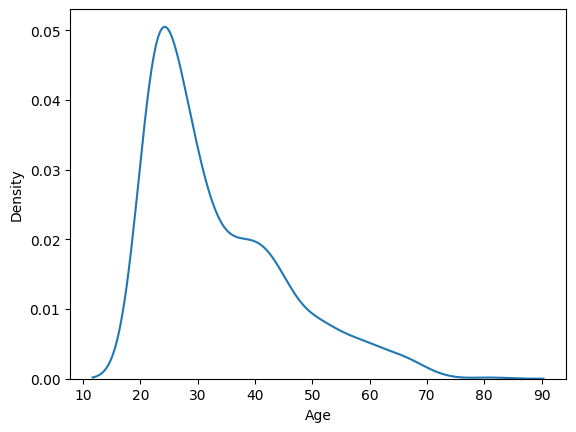

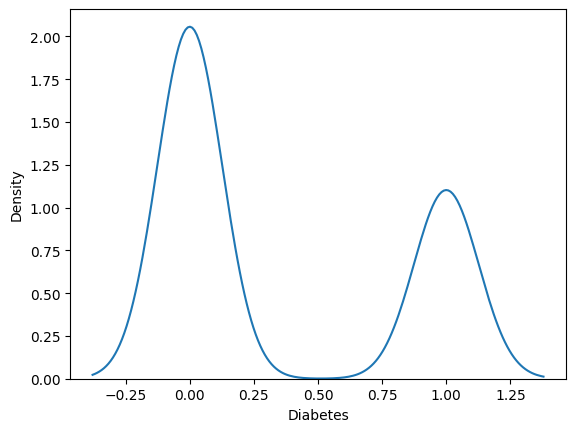

In [13]:
for i in df.columns :
    if df[i].dtype != "object":
       sns.kdeplot(x=df[i])
    plt.show();

Boxplot

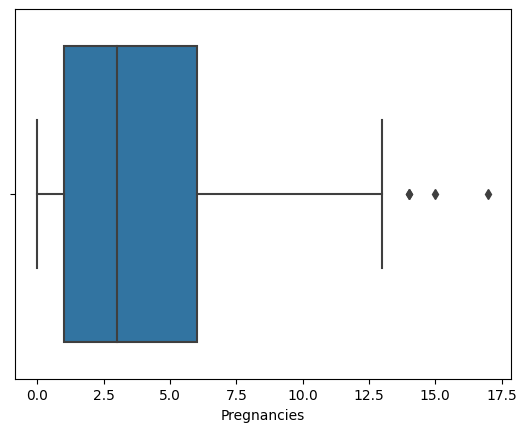

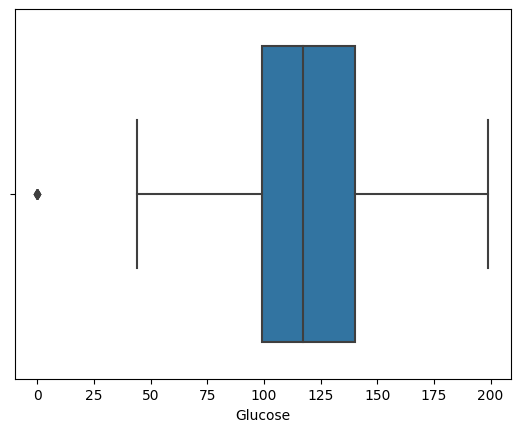

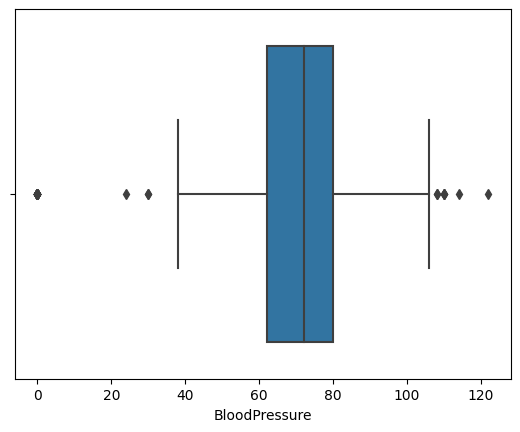

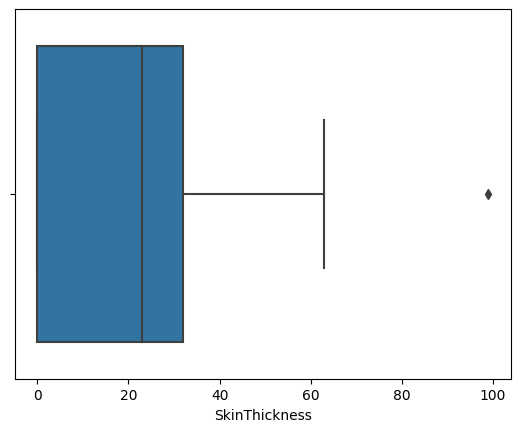

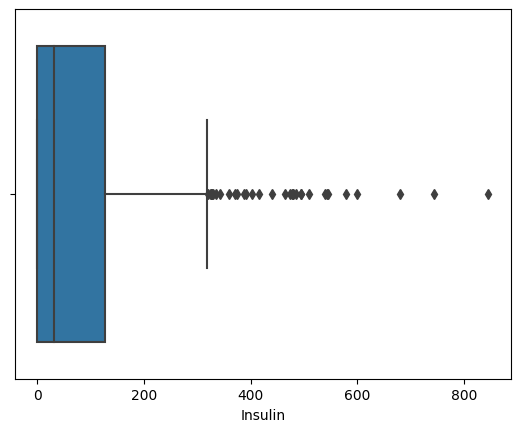

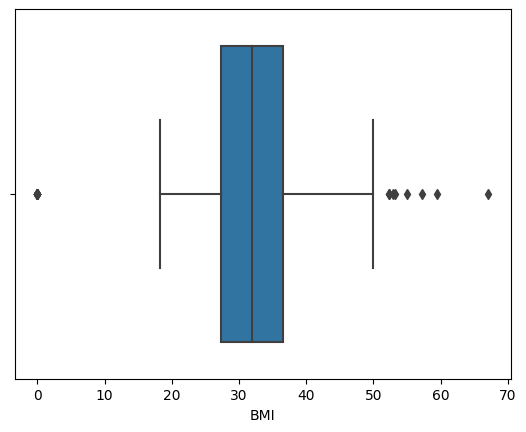

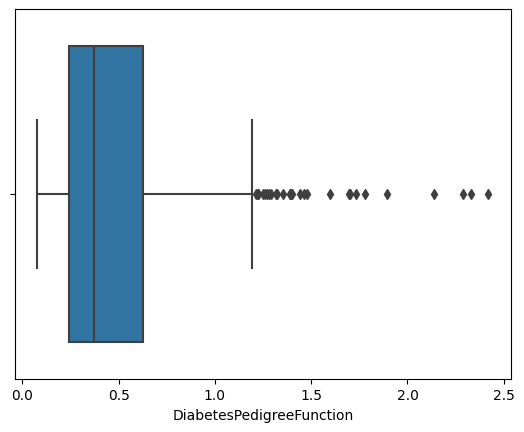

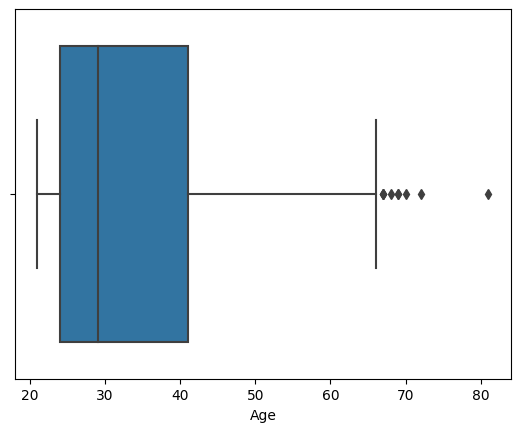

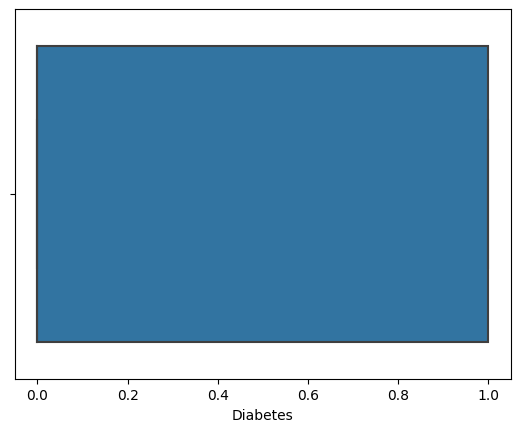

In [14]:
for i in df.columns :
    if df[i].dtype != "object":
       sns.boxplot(x=df[i])
    plt.show();

Multivariate Analysis

Bar chart

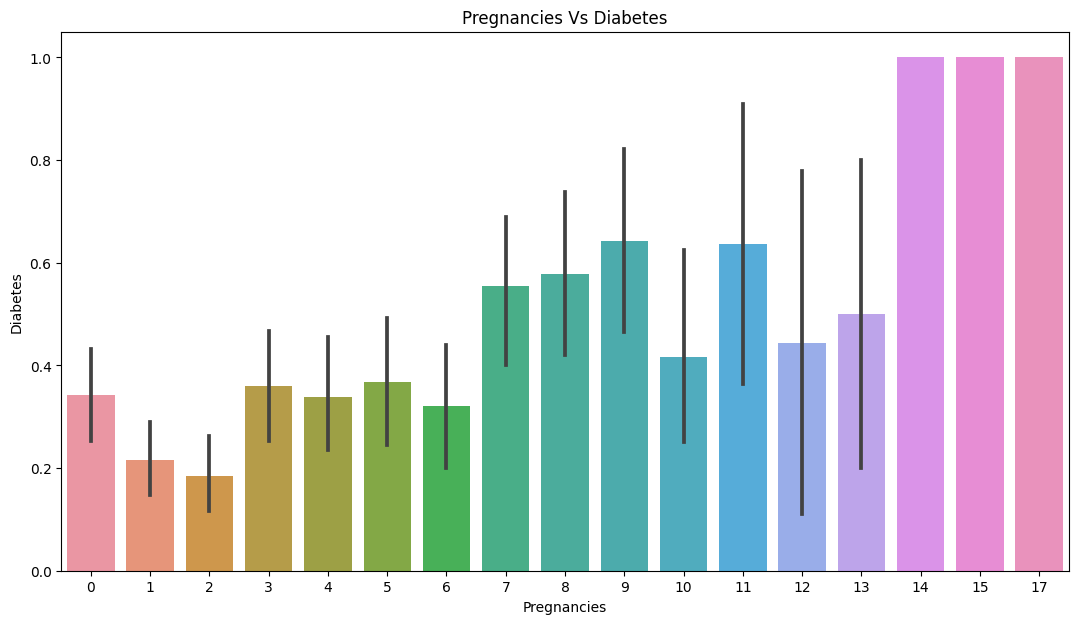

In [15]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies Vs Diabetes")
sns.barplot(x='Pregnancies', y='Diabetes', data = df);
plt.show()

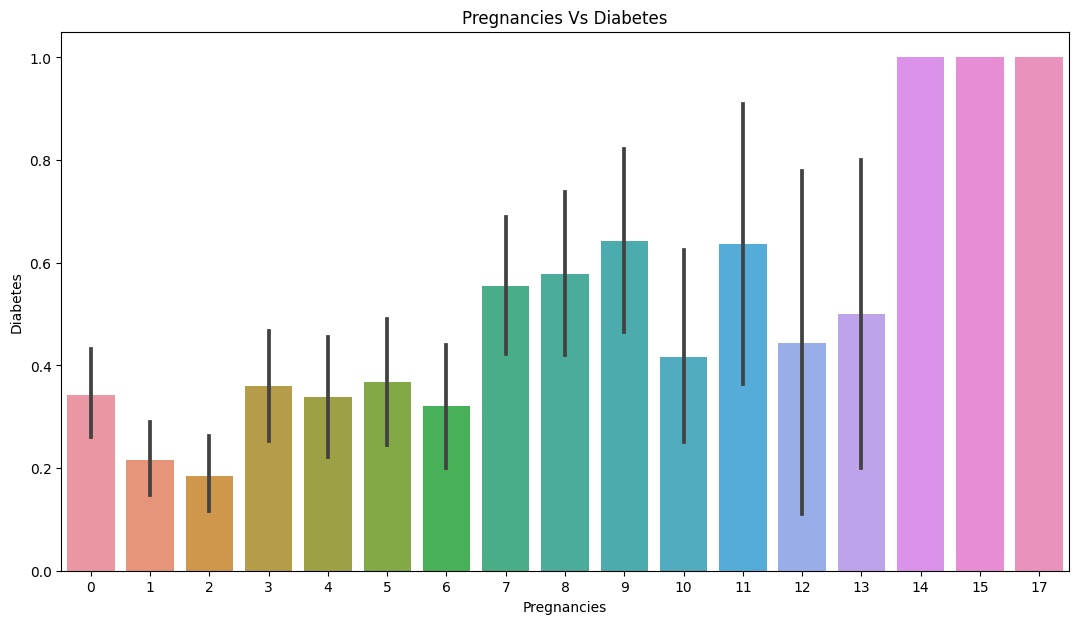

In [16]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies Vs Diabetes")
sns.barplot(x='Pregnancies', y='Diabetes', data = df);
plt.show()

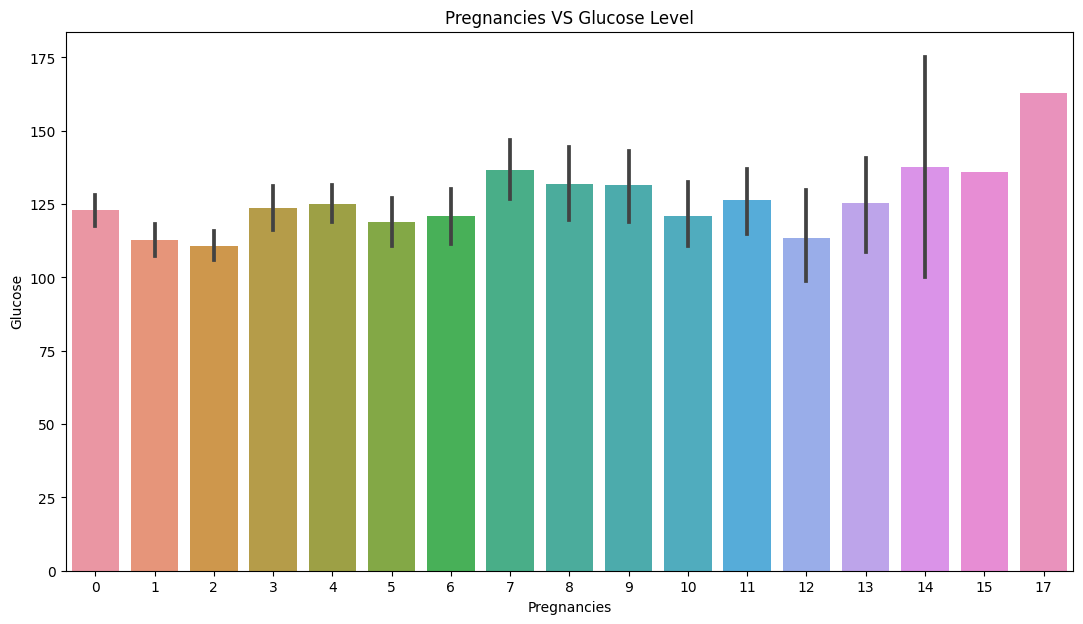

In [17]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies VS Glucose Level")
sns.barplot(x='Pregnancies', y='Glucose', data=df);

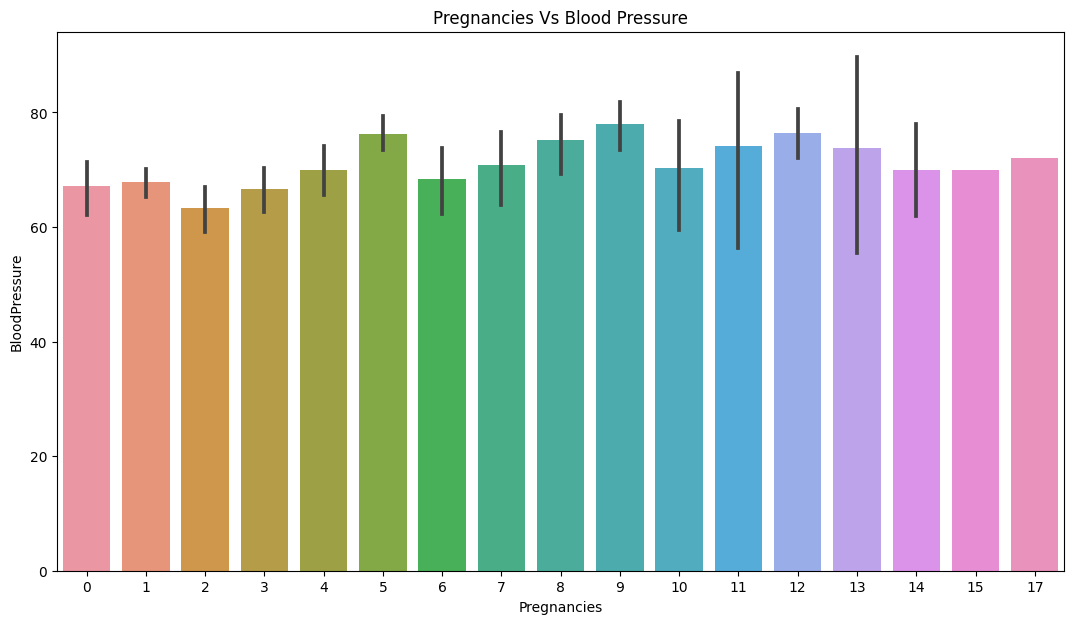

In [18]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies Vs Blood Pressure")
sns.barplot(x='Pregnancies', y='BloodPressure', data = df);

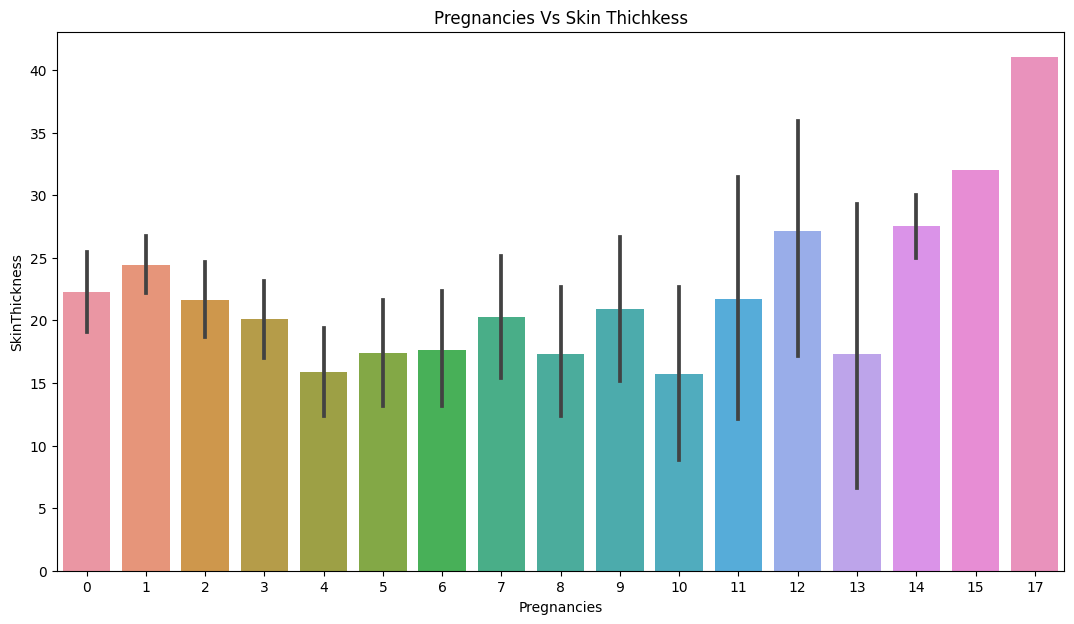

In [19]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies Vs Skin Thichkess")
sns.barplot(x='Pregnancies', y='SkinThickness', data = df);

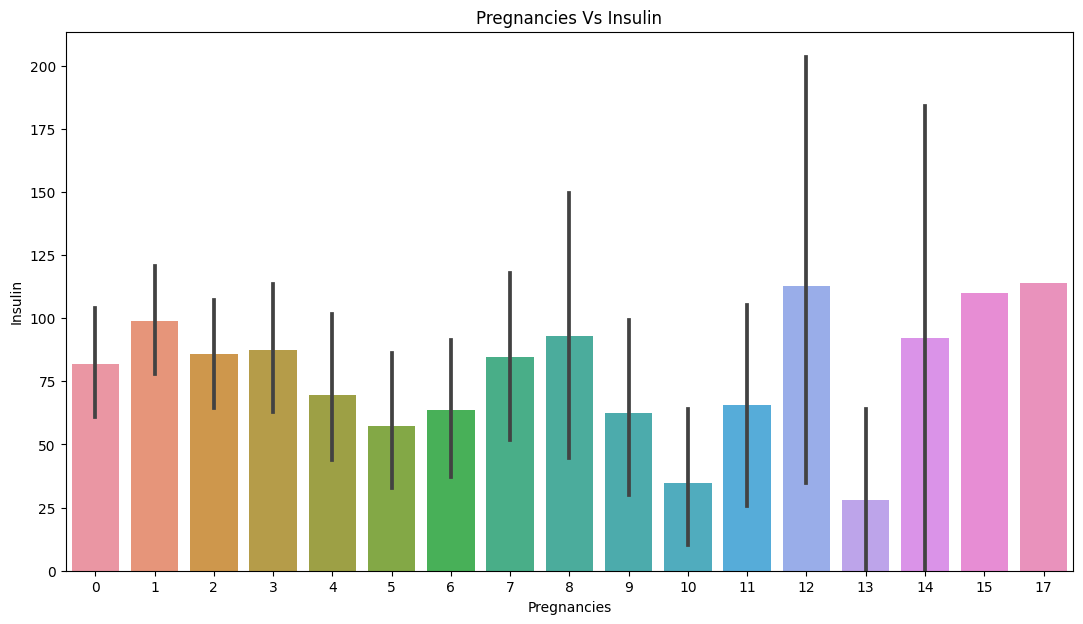

In [20]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies Vs Insulin")
sns.barplot(x='Pregnancies', y='Insulin', data = df);

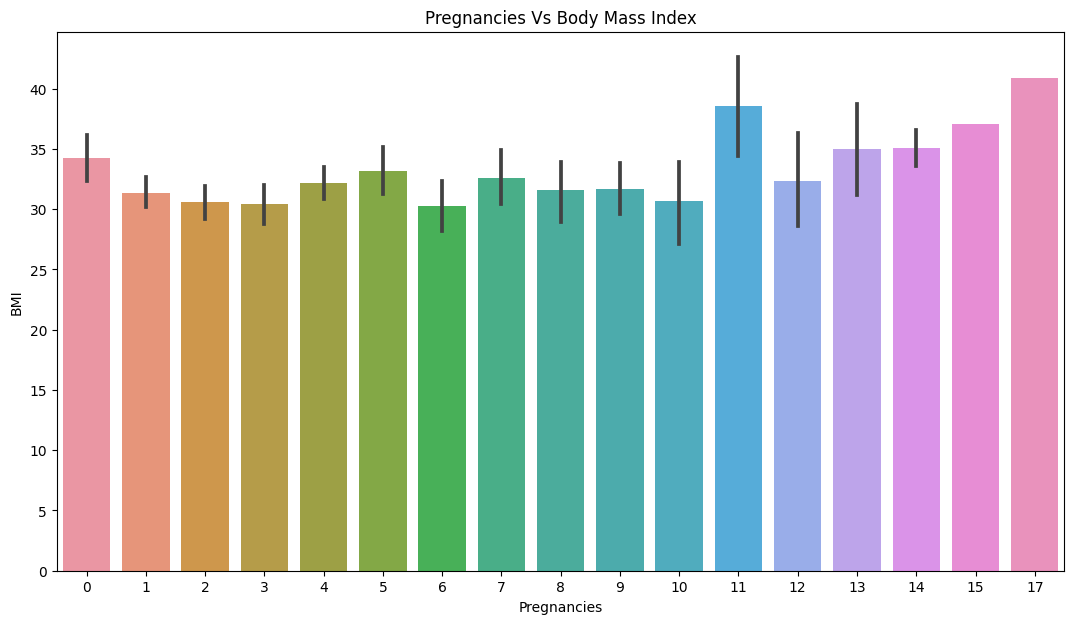

In [21]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies Vs Body Mass Index")
sns.barplot(x='Pregnancies', y='BMI', data = df);

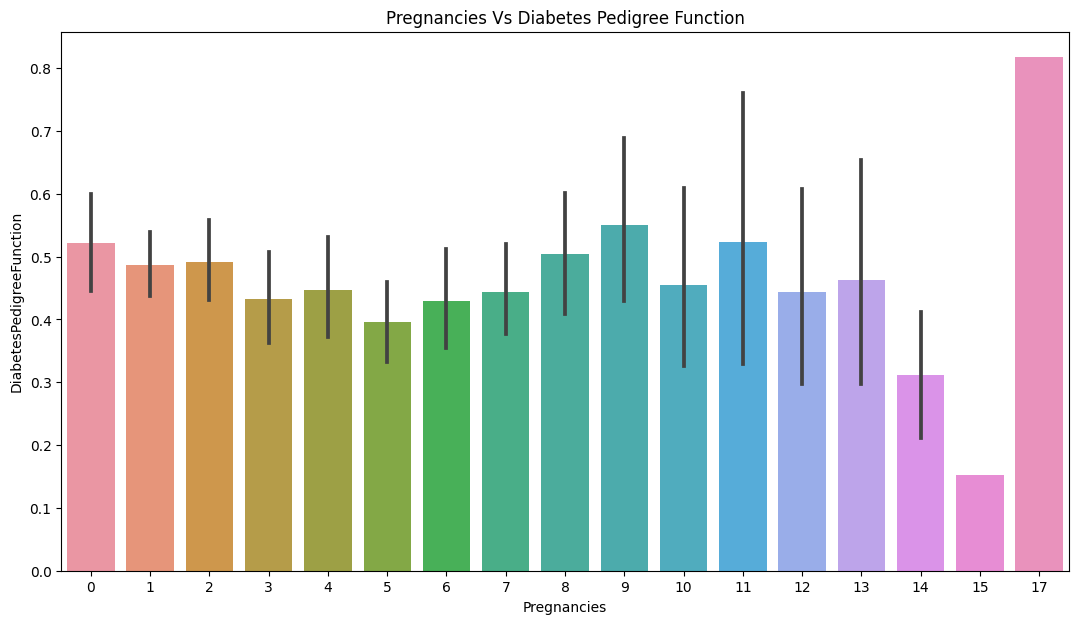

In [22]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies Vs Diabetes Pedigree Function")
sns.barplot(x='Pregnancies', y='DiabetesPedigreeFunction', data = df);

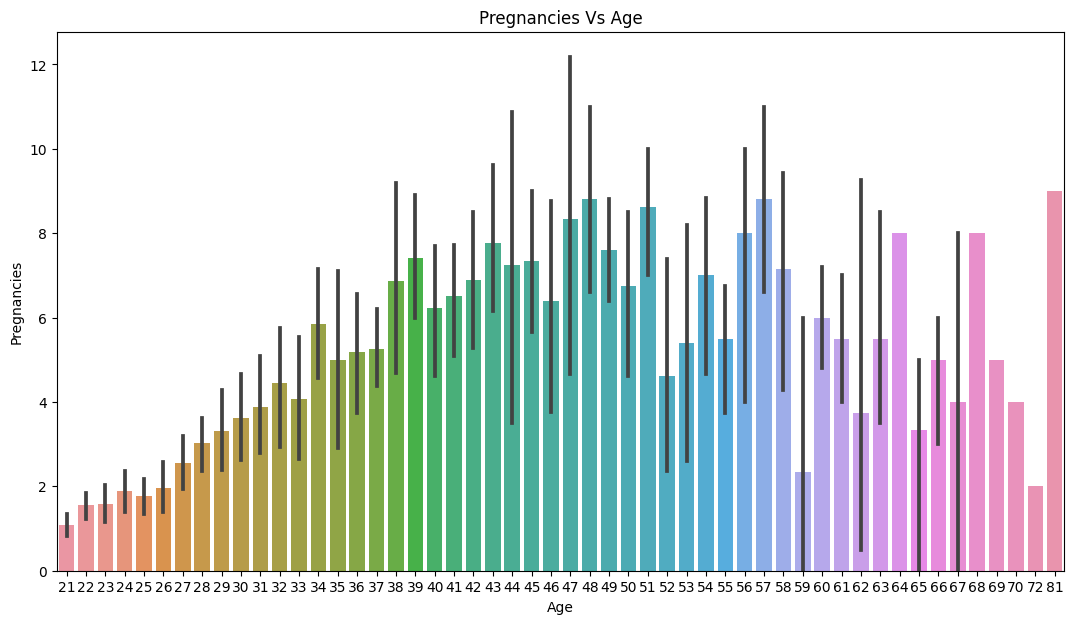

In [23]:
plt.figure(figsize=(13,7))
plt.title("Pregnancies Vs Age")
sns.barplot(x='Age', y='Pregnancies', data = df);

Pie Chart

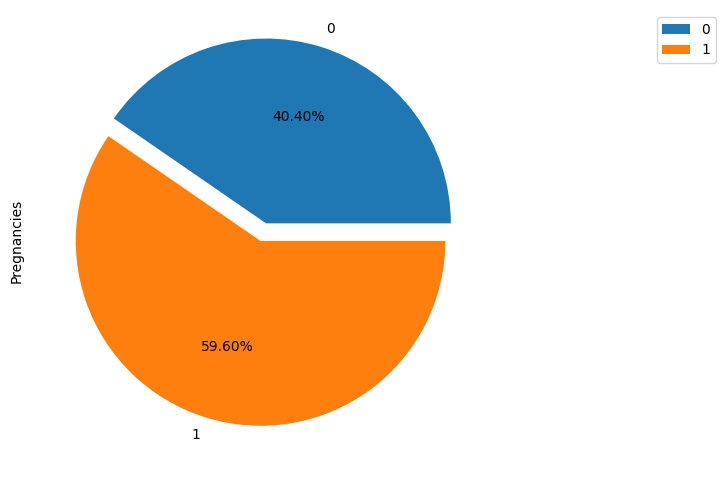

In [24]:
plt.figure(figsize=(14,6))
diabetes_pregnancies = df.groupby(['Diabetes'])['Pregnancies'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct = '%1.2f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

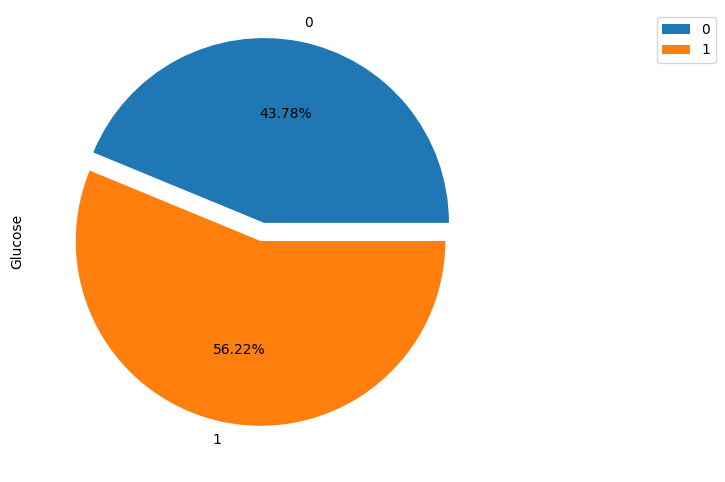

In [25]:
plt.figure(figsize=(14,6))
diabetes_pregnancies = df.groupby(['Diabetes'])['Glucose'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct = '%1.2f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

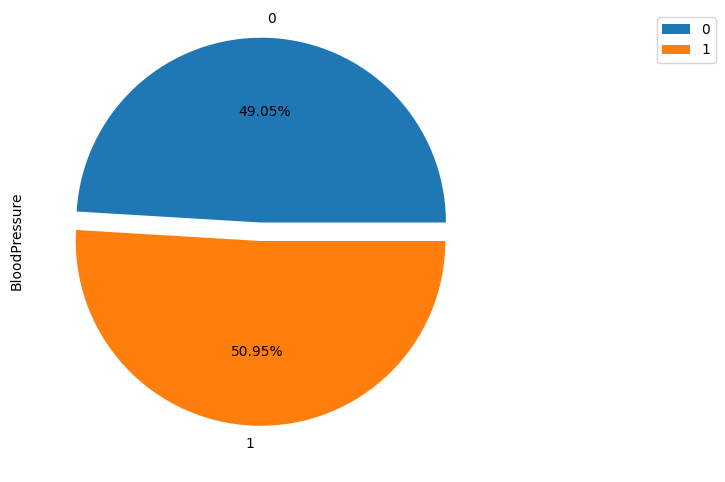

In [26]:
plt.figure(figsize=(14,6))
diabetes_pregnancies = df.groupby(['Diabetes'])['BloodPressure'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct = '%1.2f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

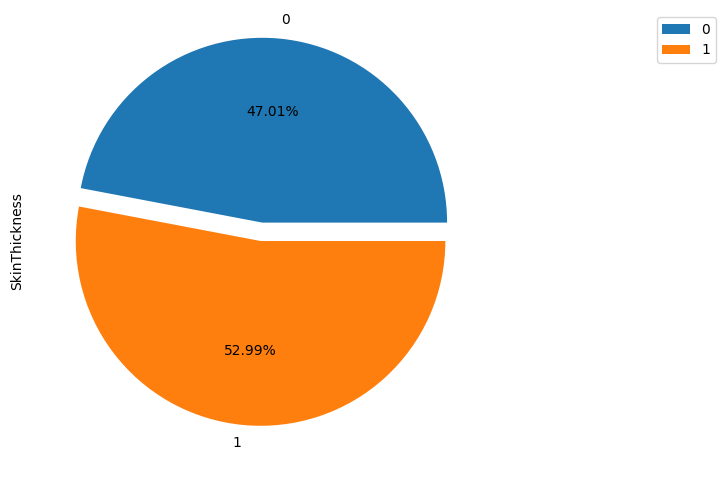

In [27]:
plt.figure(figsize=(14,6))
diabetes_pregnancies = df.groupby(['Diabetes'])['SkinThickness'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct = '%1.2f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

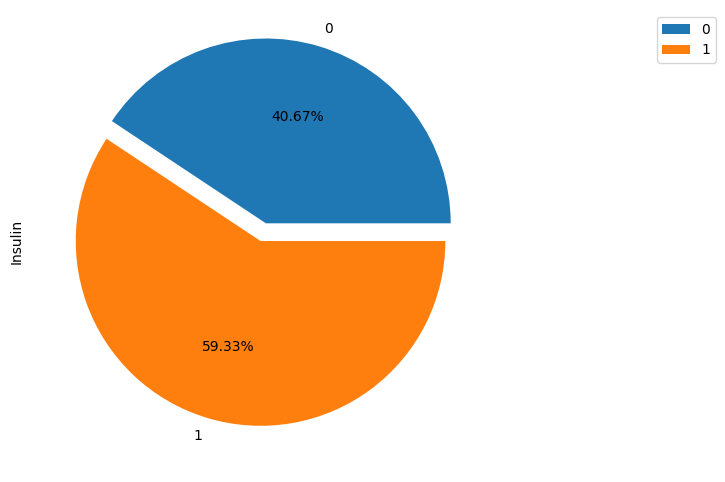

In [28]:
plt.figure(figsize=(14,6))
diabetes_pregnancies = df.groupby(['Diabetes'])['Insulin'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct = '%1.2f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

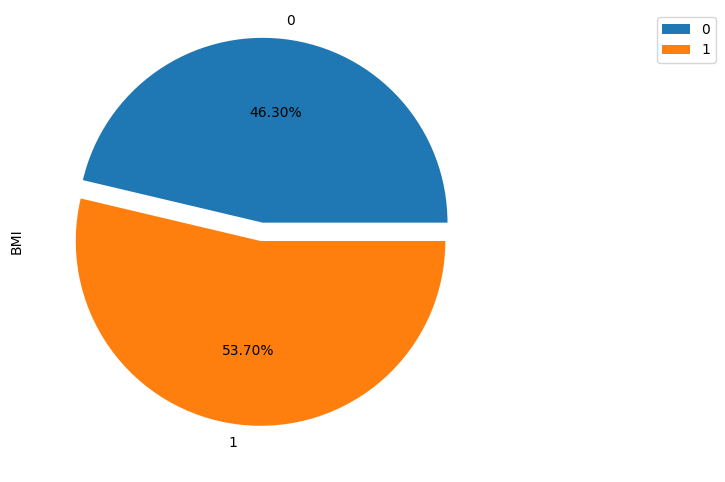

In [29]:
plt.figure(figsize=(14,6))
diabetes_pregnancies = df.groupby(['Diabetes'])['BMI'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct = '%1.2f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

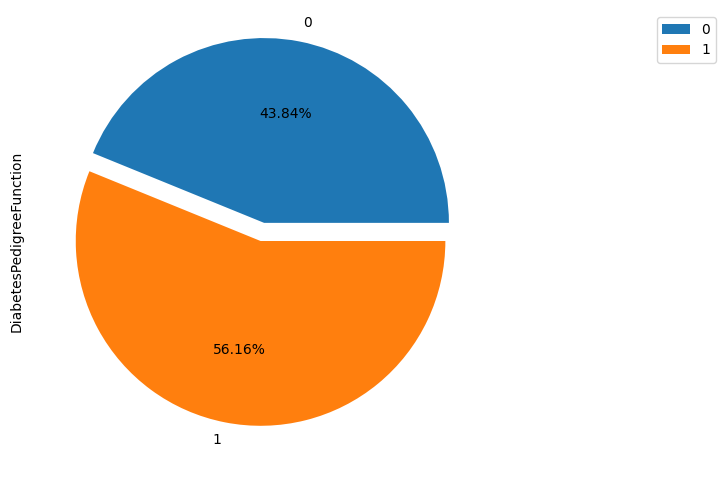

In [30]:
plt.figure(figsize=(14,6))
diabetes_pregnancies = df.groupby(['Diabetes'])['DiabetesPedigreeFunction'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct = '%1.2f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

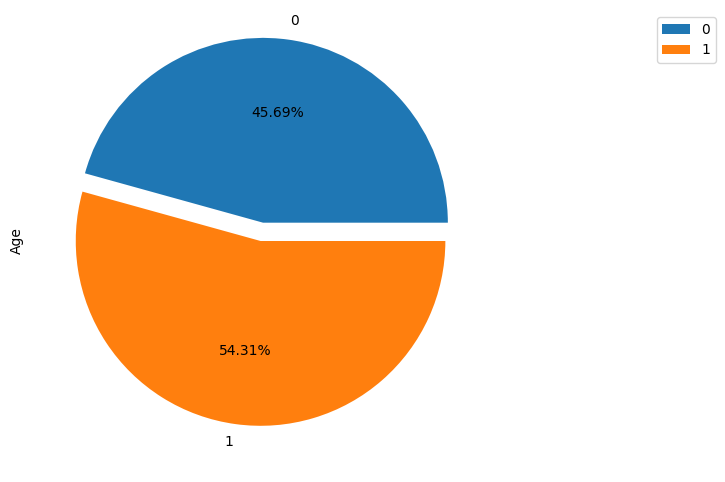

In [31]:
plt.figure(figsize=(14,6))
diabetes_pregnancies = df.groupby(['Diabetes'])['Age'].mean()
explode=0.1,0
diabetes_pregnancies.plot.pie(autopct = '%1.2f%%', explode=explode)
plt.legend(bbox_to_anchor=(1.5,1))
plt.show()

Pair Plot

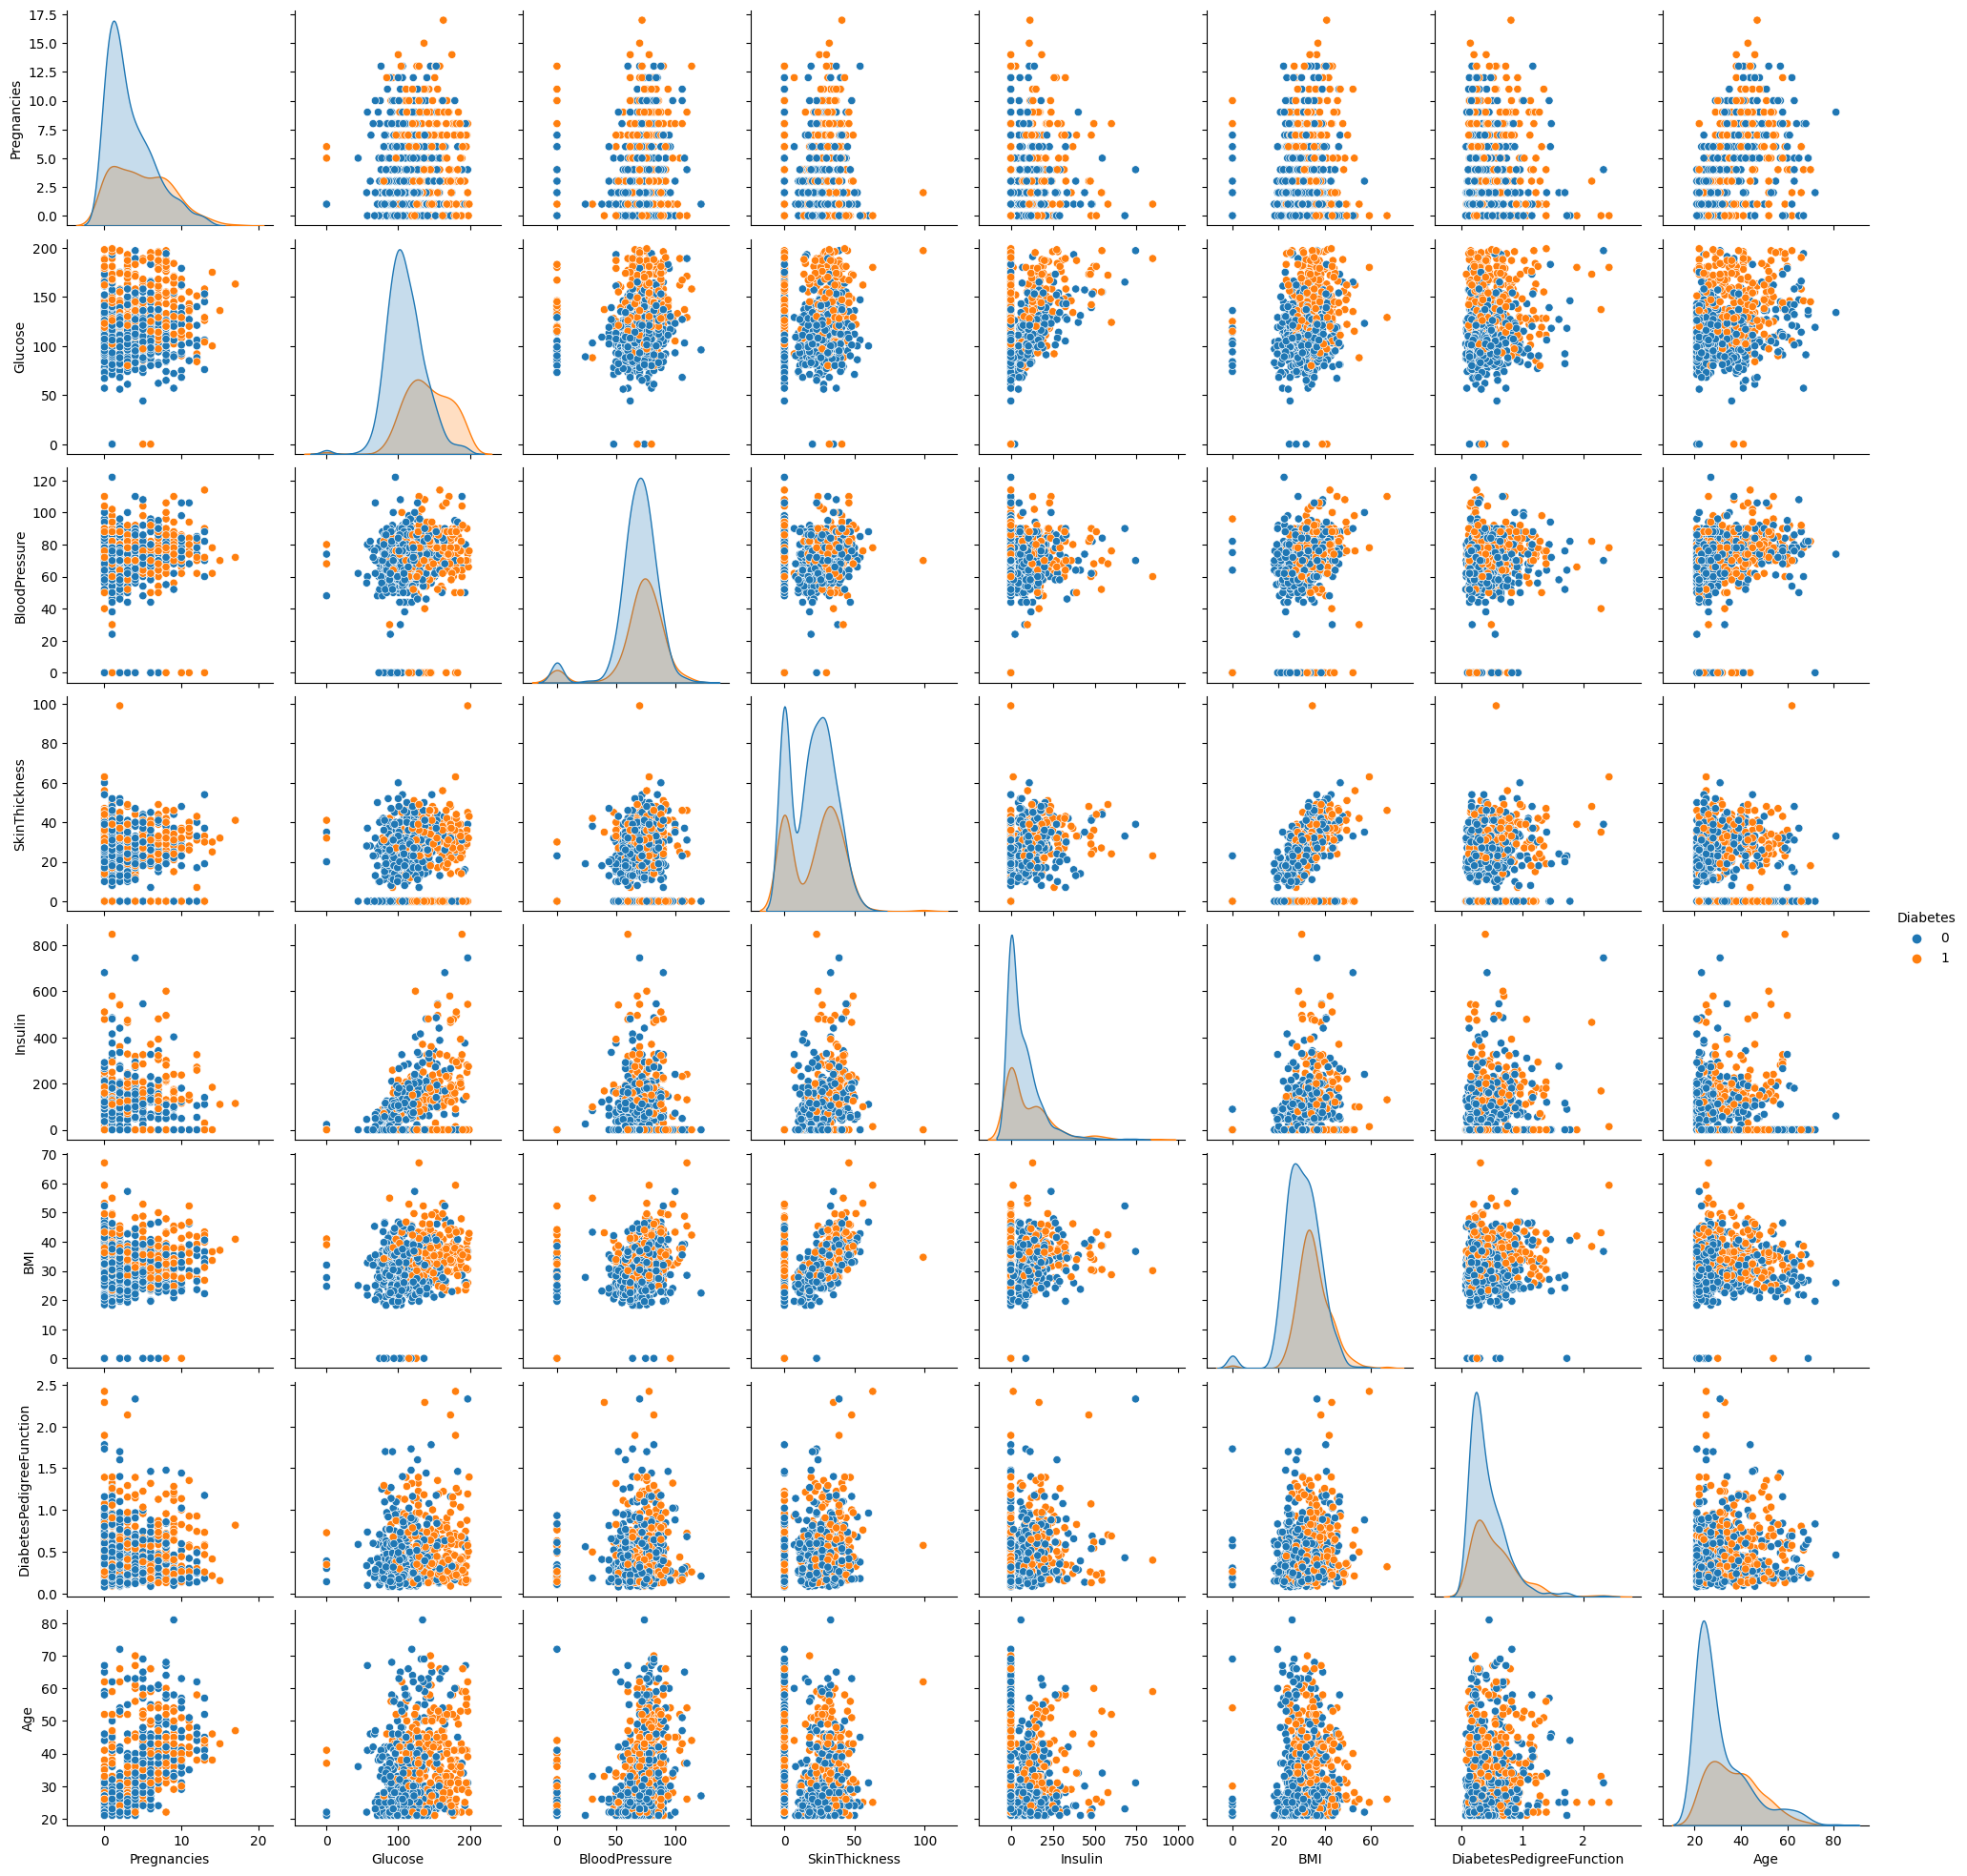

In [32]:
sns.pairplot(data=df, kind="scatter", hue="Diabetes");
plt.show();

Line Chart

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes'],
      dtype='object')

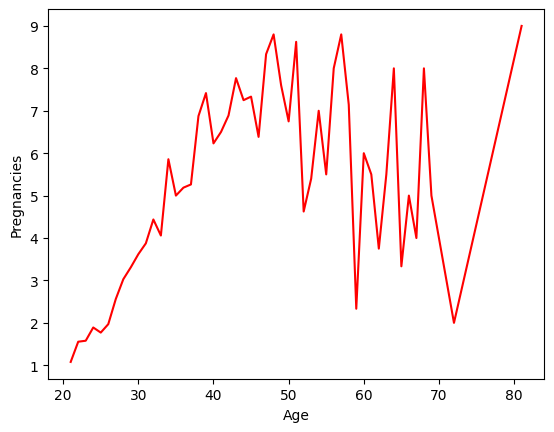

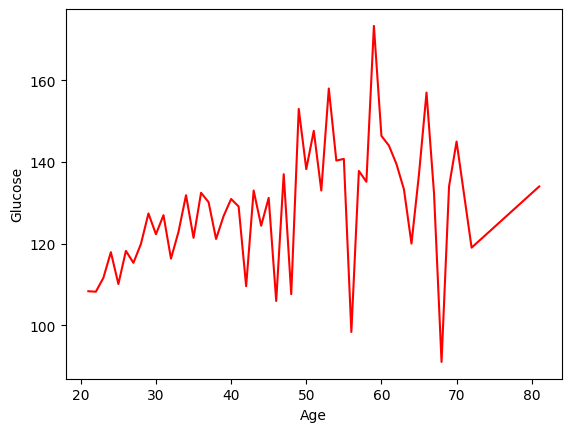

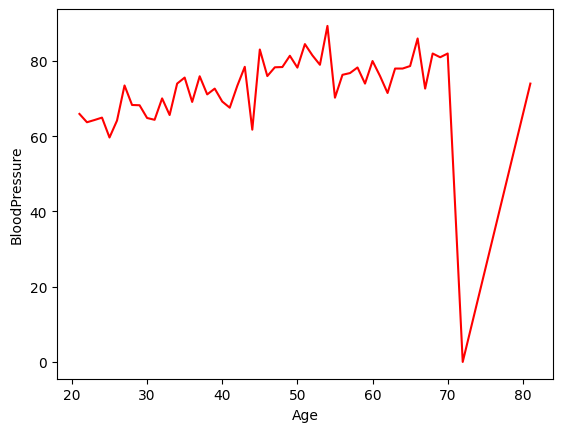

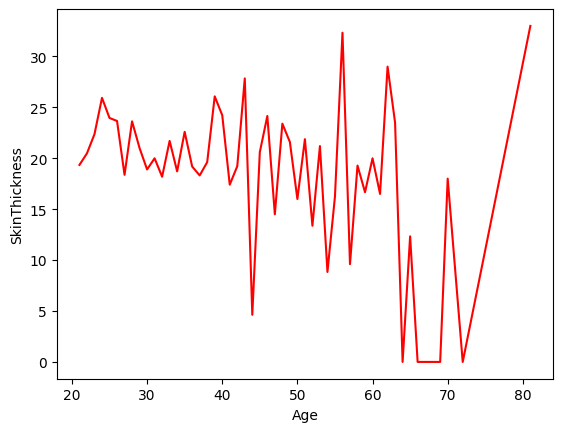

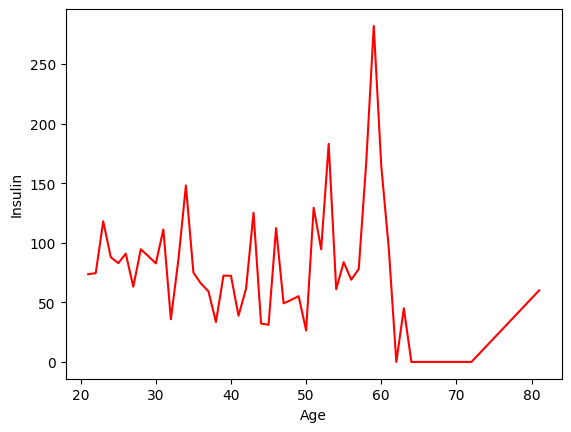

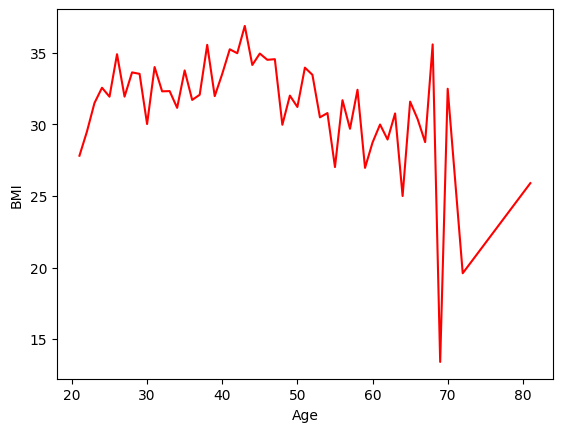

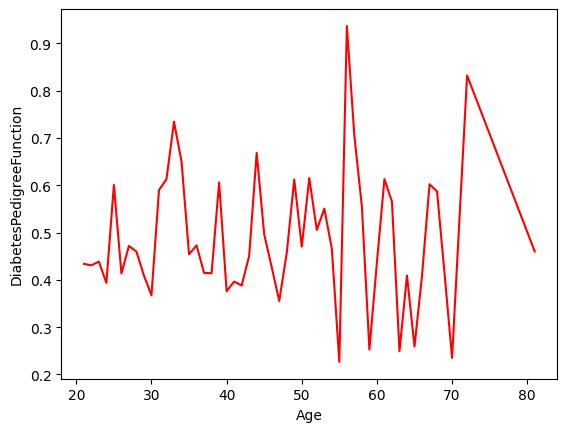

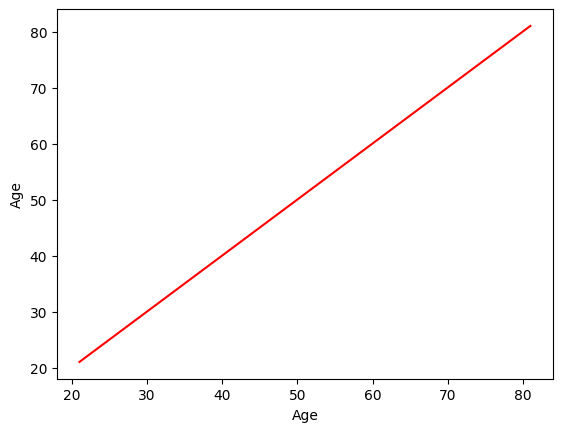

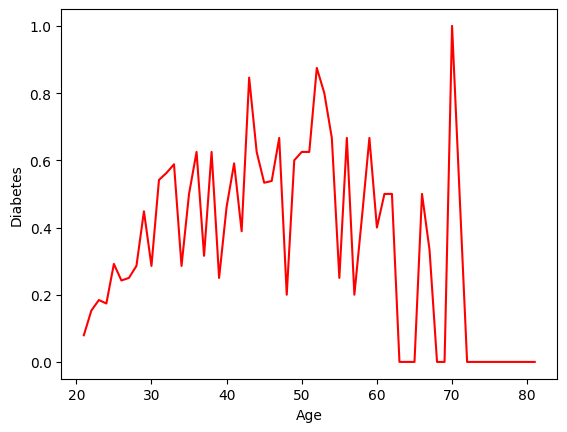

In [34]:
a=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes']
for i in a:
    sns.lineplot(x='Age', y=df[i], data=df,errorbar=None, color="Red")
    plt.show();

In [35]:
x=df.iloc[:,:-1].values
y=df.iloc[:,:-1].values

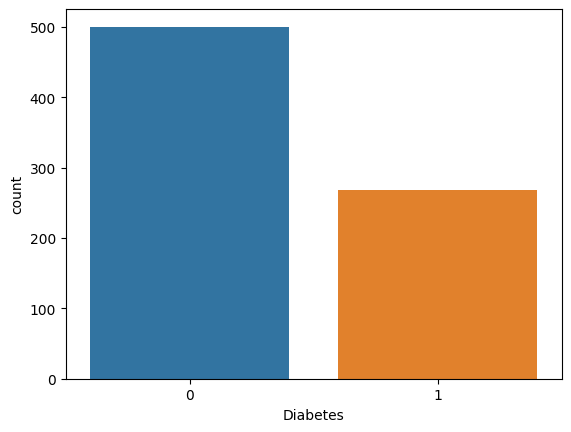

In [36]:
y = df['Diabetes']
sns.countplot(x=y)
plt.show()

we can see that is balanced, so we wuse oversampling

In [37]:
over_sampler= RandomOverSampler()

In [38]:
x,y = over_sampler.fit_resample(x,y)

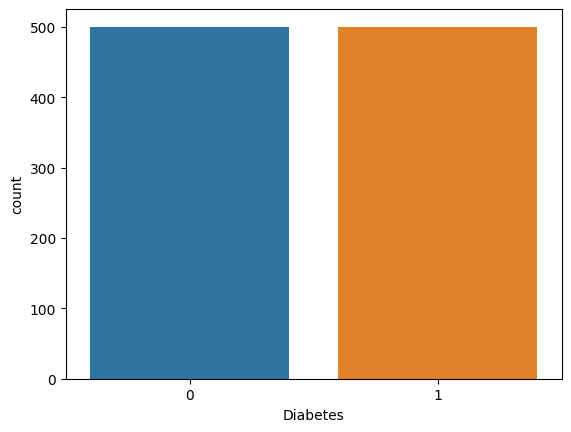

In [39]:
sns.countplot(x=y);

Good ! we can see now the data is balanced

Standrize

In [40]:
df.Diabetes.unique()

array([1, 0])

In [41]:
sc=StandardScaler()
x = sc.fit_transform(x)

selecting Random Forest classifier

In [42]:
model = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [43]:
model.fit(x_train,y_train)
print("model trained witth {}".format(model))
score_train = accuracy_score(y_train, model.predict(x_train))
score_test = accuracy_score(y_test, model.predict(x_test))
con_train = confusion_matrix(y_train, model.predict(x_train))
con_test = confusion_matrix(y_test, model.predict(x_test))

print("Model accuracy on train is :", score_train)
print("Model accuracy on test is :", score_test)
print("Confusion Matrix train is :", con_train)
print("Confusion Matrix test is :", con_test)
print("Wrong predictions made:",(y_test !=model.predict(x_test)).sum(),'/',((y_test ==model.predict(x_test))))
print ("*"* 70)

model trained witth RandomForestClassifier()
Model accuracy on train is : 1.0
Model accuracy on test is : 0.855
Confusion Matrix train is : [[395   0]
 [  0 405]]
Confusion Matrix test is : [[87 18]
 [11 84]]
Wrong predictions made: 29 / 993     True
859     True
298    False
553     True
672     True
       ...  
679     True
722     True
215     True
653     True
150    False
Name: Diabetes, Length: 200, dtype: bool
**********************************************************************


We comapre the actual and predict value

In [44]:
output= pd.DataFrame(zip(y,model.predict(x)), columns=("Actual","Prediction"), dtype = int)
output.sample(10)

,Actual,Prediction
194,0,0
963,1,1
450,0,0
92,0,0
236,1,1
646,1,1
945,1,1
554,0,0
695,1,1
111,1,1


Plotting Confusion Matrix for training and testiong

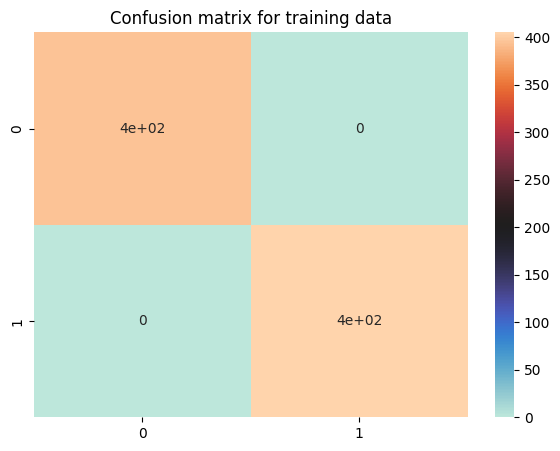

In [45]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for training data")
sns.heatmap(con_train, annot= True, cmap='icefire');

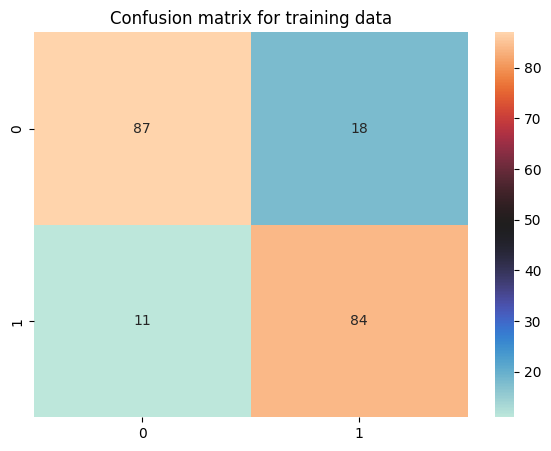

In [46]:
plt.figure(figsize=(7,5))
plt.title("Confusion matrix for training data")
sns.heatmap(con_test, annot= True, cmap='icefire');

Computing ROC and AUC

Model used is : RandomForestClassifier()


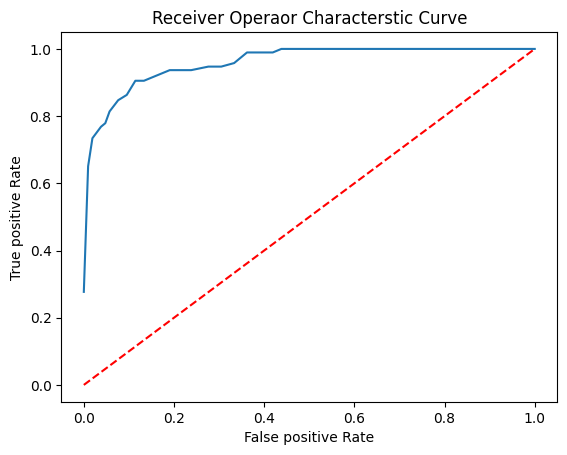

In [47]:
model.fit(x_train,y_train)
probs = model.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print ("Model used is :", model)
sns.lineplot(x=fpr, y=tpr,errorbar= None)
plt.plot([0,1],[0,1],color="Red", linestyle='--')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operaor Characterstic Curve")
plt.show();